<a href="https://colab.research.google.com/github/shreythapar/ML_Dataset/blob/main/ML_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

data = pd.read_csv("https://raw.githubusercontent.com/shreythapar/ML_Dataset/main/CarPrice_Assignment.csv")


In [3]:
data.shape

(205, 26)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
X = data[['stroke']]
Y = data['compressionratio']
# fit the linear model using MIN
lm.fit(X,Y)
# training data is passed to fit method

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
Yhat=lm.predict(X)
Yhat[0:10]

array([25.4143682 , 25.4143682 , 25.4143682 , 24.63570384, 24.63570384,
       24.63570384, 24.63570384, 24.63570384, 24.63570384, 24.63570384])

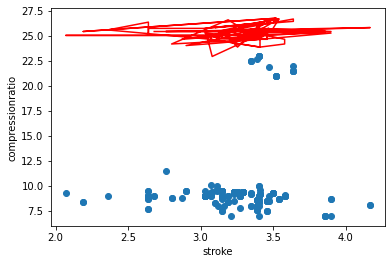

In [15]:
plt.scatter(data['stroke'],Y)
# X,Y
plt.plot(data['stroke'],Yhat,color='red')
plt.xlabel('stroke')
plt.ylabel('compressionratio')
plt.show()

In [16]:
print(lm.intercept_)
print(lm.coef_)

2.4686034984395633
[2.35728285]


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# model evaluation
rmse = mean_squared_error(Y, Yhat)
r2 = r2_score(Y, Yhat)

print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Root mean squared error:  241.00564818212058
R2 score:  -14.350538573431459


In [18]:
X=X.iloc[:,0]

In [19]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

2.5703980638846735 0.7858939149872145


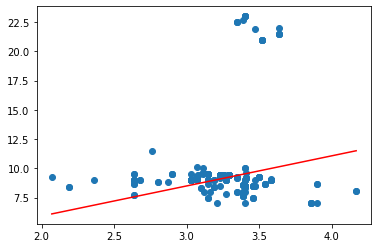

In [20]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [21]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split

In [23]:
X = data[['stroke']][0:400]
Y = data['compressionratio'][0:400]
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.4, random_state=42)
model_lasso=Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train)
predictions= model_lasso.predict(x_test)
print("R2 Lasso", r2_score(y_test, predictions))

R2 Lasso 0.044045365628129884


In [24]:
model_ridge=Ridge(alpha=0.01)
model_ridge.fit(x_train, y_train)
predictions= model_ridge.predict(x_test)
print("R2 ridge", r2_score(y_test, predictions))

R2 ridge 0.04566414811974551
